In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bank.csv')

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.shape

(11162, 17)

In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

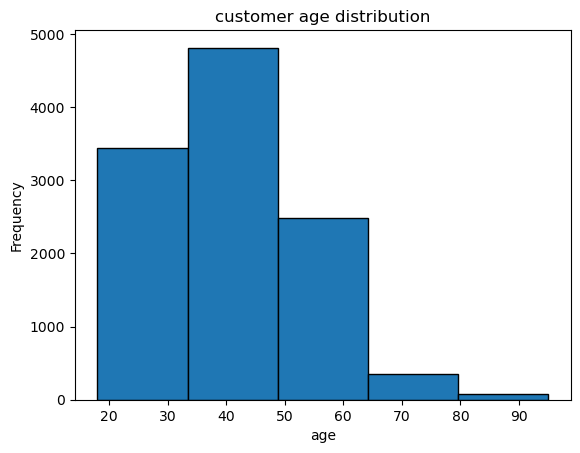

In [9]:
dist_age = df['age']
plt.hist(dist_age, bins=5, edgecolor='black')
plt.title('customer age distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [10]:
customer_job = df['job'].value_counts()
print(customer_job)

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


In [11]:
marital_stat = df['marital'].value_counts()
print("Total number of customers by marital status:\n"
      ,marital_stat)

Total number of customers by marital status:
 marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


In [12]:
solde = round(df.groupby('job')['balance'].mean().reset_index(name='average_balance'),2)
print(solde)

              job  average_balance
0          admin.          1195.87
1     blue-collar          1203.93
2    entrepreneur          1621.94
3       housemaid          1366.16
4      management          1793.66
5         retired          2417.25
6   self-employed          1865.37
7        services          1081.17
8         student          1500.78
9      technician          1556.29
10     unemployed          1314.72
11        unknown          1945.46


In [13]:
df.groupby(['job','marital']).size().reset_index(name='total number')

,job,marital,total number
0,admin.,divorced,182
1,admin.,married,677
2,admin.,single,475
3,blue-collar,divorced,149
4,blue-collar,married,1335
5,blue-collar,single,460
6,entrepreneur,divorced,42
7,entrepreneur,married,234
8,entrepreneur,single,52
9,housemaid,divorced,46


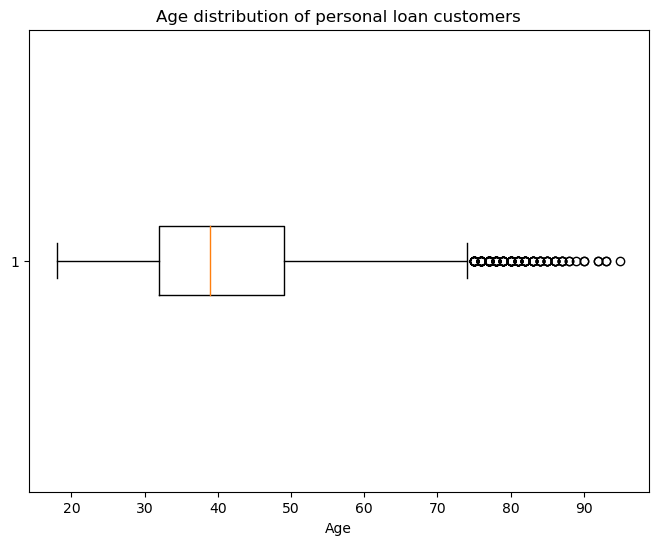

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False)
plt.title('Age distribution of personal loan customers')
plt.xlabel('Age')
plt.show()

In [23]:
print(df['marital'].unique())

['married' 'single' 'divorced']


In [24]:
marital_mapping = {
    'single': 0,
    'married': 1,
    'divorced': 2,
}

In [25]:
df['marital'] = df['marital'].map(marital_mapping)

In [26]:
print(df['marital'].head())
print(df['marital'].dtype)


0    1
1    1
2    1
3    1
4    1
Name: marital, dtype: int64
int64


In [32]:
df.columns
df.dtypes

age           int64
job          object
marital       int64
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

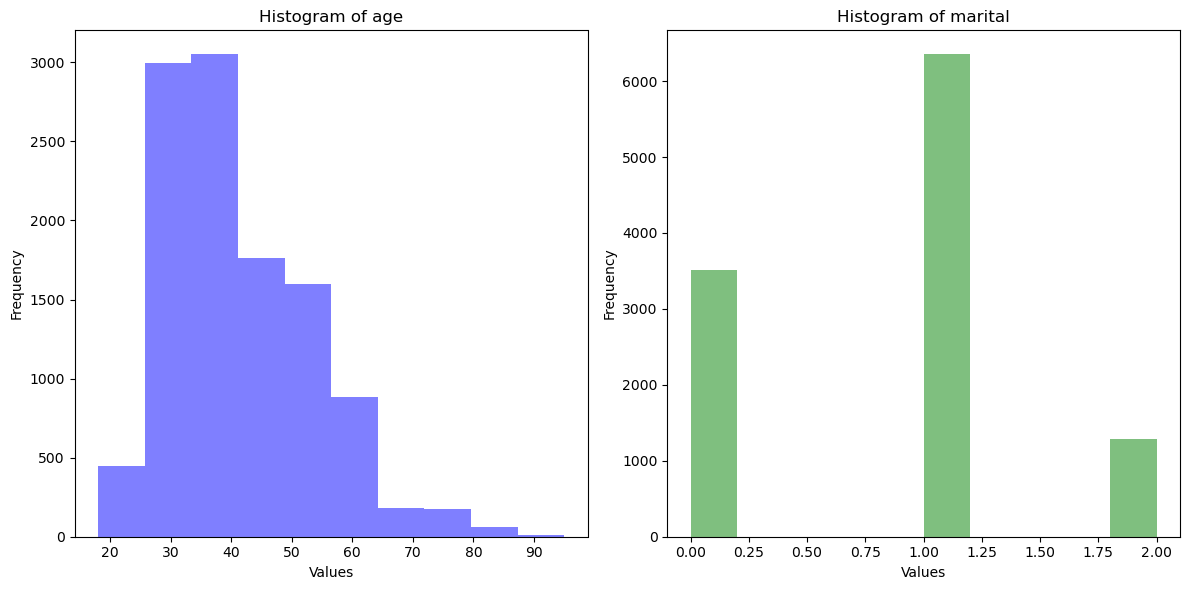

In [39]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

ax1.hist(df['age'], bins=10, alpha=0.5, color='blue')
ax1.set_title('Histogram of age')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')

ax2.hist(df['marital'], bins=10, alpha=0.5, color='green')
ax2.set_title('Histogram of marital')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

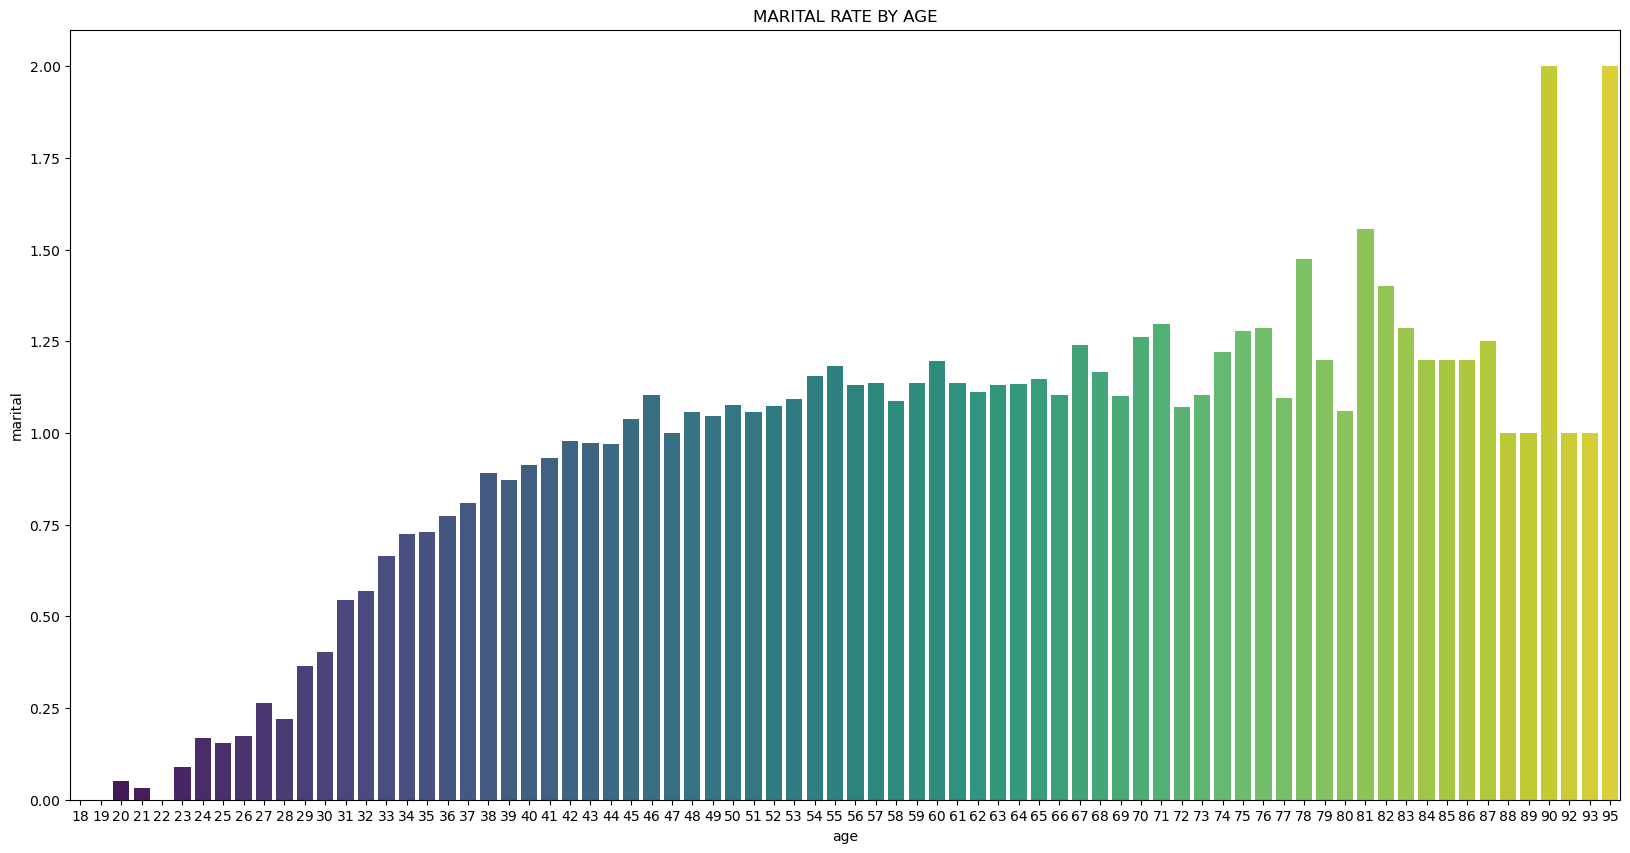

In [46]:
plt.figure(figsize=(20, 10))
marital_rate_age = df[['age', 'marital']].groupby(['age']).mean().sort_values(by='marital', ascending=False)
sns.barplot(x=marital_rate_age.index, y='marital', data=marital_rate_age, palette='viridis')
plt.title('MARITAL RATE BY AGE')
plt.xlabel('age')
plt.ylabel('marital')
plt.show()
